# Lab Exercises Week 3



## Exercise 1: Loss functions for regression

(a) Write code to produce a plot that shows how the $L1$, $L2$ and log-cosh loss functions introduced for regression depend on the value of residual $y_i - f(\mathbf{x}_i; \mathbf{w})$.

- plot the residual along the $x$-axis (ranging from -5 to 5, say)
- plot the loss functions along the y-axis
- use a key to distinguish between the loss functions

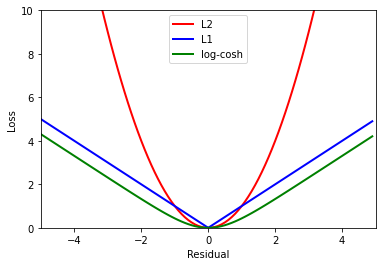

In [15]:
# clare-c@ulster.ac.uk
import matplotlib.pyplot as plt
import numpy as np

residual_vals = np.arange(-5,5,0.1)
plt.plot(residual_vals,abs(residual_vals)**2,'r-',linewidth=2,label='L2')
plt.plot(residual_vals,abs(residual_vals),'b-',linewidth=2,label='L1')
plt.plot(residual_vals,np.log(np.cosh(residual_vals)),'g-',linewidth=2,label='log-cosh')
plt.xlabel('Residual')
plt.ylabel('Loss')
plt.xlim(-5,5)
plt.ylim(0,10)
plt.legend()
plt.show()

(b) Write code to produce a plot that shows how the Huber loss function depends on the value of the residual $y_i - f(\mathbf{x}_i; \mathbf{w})$.  Plot 3 curves on the same plot, corresponding to values of $\delta = 0.1, 1, 10$. USe a key to distinguish between the 3 curves. 

Hint:
- write a function `huber` that takes in a value for delta, and a value for the residual, and returns the value of the loss
- use this inside a for loop to build up arrays of values of the Huber loss for a range of residual values between -5 and 5

## Exercise 2: HuberRegressor in scikit-learn

Read through the documentaion for `HuberRegressor` in scikit-learn:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html

Use HuberRegressor to fit a line through the data given in the cell below.
Note, the parameters used in scikit-learn are different from what was introduced in the lecture: use the recommended value for `epsilon`, i.e. 1.35.

Compare the line to that of least squares regressor.

In [2]:
import numpy as np
x_vals = np.array([[-0.372180347],[-0.630104555],[-1.150723051],[0.933616921],[-0.831975033],
              [-1.656988490],[1.124082010],[-0.393019792],[-0.732695333],[0.452214528]])
y_vals = np.array([[-1.174803460],[-1.856390758],[-2.256630546],[9.994548305],[-1.710868702],
             [-2.682265692],[0.191515393],[-1.247013155],[-1.684018106],[-0.624466506]])



## Exercise 3: Random search

Below is code for the random search algorithm.

Write code for the function:

$g(w_1,w_2) = w_1^2 + w_2^2 + 2$ 

(a) Optimize this function using random search with the following settings and produce the cost function history plot.
- initial weight $\mathbf{w}^0 = \begin{bmatrix} 3 \\ 4\end{bmatrix}$ 
- $\alpha = 1$
- $K = 5$ steps
- $P = 1000$ samples

(b) Repeat with $\mathbf{w}^0 = \begin{bmatrix} 1.5 \\ 2\end{bmatrix}$. In this case, the algorithm does not converge to the optimum (this was the example used in lecture).  Try to get it to converge using the initial weight, by changing the steplength to be diminishing.

(c) If you have time, plot contour plots showing the iterations in (a) and (b)

In [3]:
# random search function 
def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w.T)
        cost_history.append(g(w.T))
        
        # construct set of random unit directions
        directions = np.random.randn(num_samples,np.size(w))
        norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
        directions = directions/norms   
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val.T) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w.T):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w.T)
    cost_history.append(g(w.T))
    return weight_history,cost_history



## Exercise 4: Hyperparameter Optimization

Read through (focussing on the regression):

https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

Copy out the code for the regression examples into the cell below (add more cells if you like), and run the code.
Check you understand what is happening.

**Combined Algorithm Selection and Hyperparameter Optimization (CASH Optimization)**

This is also very much worth a read: 

https://machinelearningmastery.com/combined-algorithm-selection-and-hyperparameter-optimization/

## Exercise 5: Extra Reading

If you have time, look through some recent reviews of optimization in machine learning:

**Read Sections 1 and 2 of**: Gambella, C. et al., *Optimization problems for machine learning: A survey* , European Journal of Operational Research, In Press. (2020)

Available here: https://www.sciencedirect.com/science/article/pii/S037722172030758X
    
*A Survey of Optimization Methods From a Machine Learning Perspective*, IEEE Transactions on Cybernetics, 50 (8) (2020)

Available here: https://ieeexplore.ieee.org/document/8903465/
Also available here: https://arxiv.org/pdf/1906.06821.pdf

Yand, L. et al., *On hyperparameter optimization of machine learning algorithms: Theory and practice*, Neurocomputing 415 pp. 295-316 (2020)

Available here: https://www.sciencedirect.com/science/article/pii/S0925231220311693